<a href="https://colab.research.google.com/github/gabrielarabelo/data_science/blob/main/funcao_matriz_par_a_par.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Função para Criação de Matriz par a par
---

Adaptado a partir do artigo: [Deep dive into Analytical Hierarchy Process using Python (Anirudh Chandra)](https://archive.is/6PLXj)

In [5]:
# Função para gerar Matriz de Comparação par a par a partir de uma Lista de Strings
import numpy as np

# Criando a Função
def pairwise_matrix(var_list):
  n = len(var_list)
  A = np.ones([n,n])
  for i in range(0,n):
    for j in range(0,n):
      if i<j:
        opi = var_list[i]
        opj = var_list[j]
        aij = input('Qual a importância de {} em relação a {} ?: '.format(opi,opj))
        A[i,j] = float(aij)   # triângulo superior
        A[j,i] = 1/float(aij) # triângulo inferior

  # Computa o vetor de prioridade
  eig_val = np.linalg.eig(A)[0].max()
  eig_vec = np.linalg.eig(A)[1][:,0]
  p = eig_vec/eig_vec.sum()

  # Mostrar Matriz Gerada:
  print('---------------------')
  print('Matriz de Comparação Par a Par:')
  print(A)
  print('---------------------')
  print('Autovalor (Eigenvalue)')
  print(eig_val)
  print('Autovetor (Eigenvector)')
  print(eig_vec)
  print('Autovetor normalizado')
  print(p)

  return A, p, eig_val

In [12]:
# Criar Variável
parametros = ['Item1','Item2','Item3']

A, p, eig_val = pairwise_matrix(parametros)

Qual a importância de Item1 em relação a Item2 ?: 2
Qual a importância de Item1 em relação a Item3 ?: 4
Qual a importância de Item2 em relação a Item3 ?: 6
---------------------
Matriz de Comparação Par a Par:
[[1.         2.         4.        ]
 [0.5        1.         6.        ]
 [0.25       0.16666667 1.        ]]
---------------------
Autovalor (Eigenvalue)
(3.135610844658043+0j)
---------------------
Autovetor (Eigenvector)
[0.80320176+0.j 0.57920869+0.j 0.13922725+0.j]
---------------------
Autovetor normalizado
[0.52785348+0.j 0.38064823+0.j 0.09149829+0.j]


<Axes: >

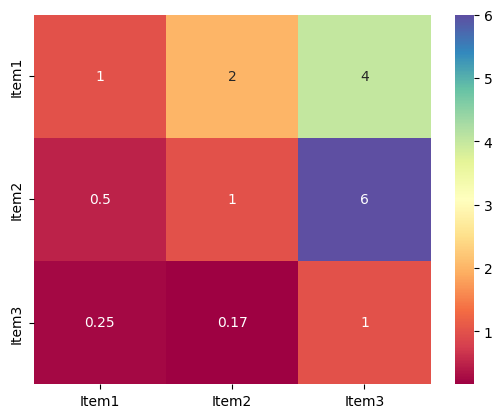

In [13]:
# Extra: Plot
import seaborn as sns
sns.heatmap(A, annot = True, xticklabels=parametros, yticklabels=parametros, cmap="Spectral")